This file is for analyzing the DockQ results.

First we look at histograms of the Capri classes.

In [404]:
import pandas as pd
import json
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.patches import Patch, Rectangle
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from statannotations.Annotator import Annotator
from pandas.plotting import table
import scienceplots

In [292]:
# Read in the data
ai1 = pd.read_csv('./project_pipeline/data/ai_dockq_results.csv').astype('object')
md = pd.read_csv('./project_pipeline/data/md_dockq_results.csv').astype('object')

plt.style.use('science')

In [293]:
# Subset autoinhibitory proteins to only those that have a labeled state and conformation
cl3 = pd.read_csv('./project_pipeline/data/classified_files_3.tsv', sep='\t').astype('object')

ai = pd.merge(ai1, cl3, on=['uniprot', 'pdb'], how='left')
print(len(ai))

ai = ai.dropna(subset=['state', 'conformation'])

print(len(ai))

824
550


## Frequencies of Capri Classes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


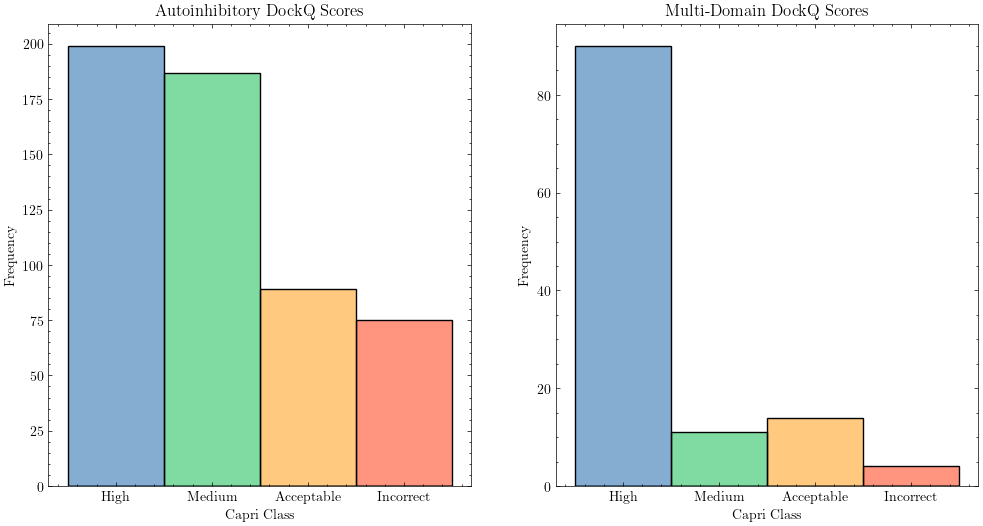

In [294]:
# Make the capri class categorical
ai['capri'] = pd.Categorical(ai['capri'], ['High', 'Medium', 'Acceptable', 'Incorrect'])
md['capri'] = pd.Categorical(md['capri'], ['High', 'Medium', 'Acceptable', 'Incorrect'])

# Make histograms of both
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Autoinhibitory DockQ
sns.histplot(ai, x='capri', hue='capri', ax=ax[0])
ax[0].set_title('Autoinhibitory DockQ Scores')
ax[0].set_xlabel('Capri Class')
ax[0].set_ylabel('Frequency')
ax[0].legend(frameon=False)
# MD DockQ
sns.histplot(md, x='capri', hue='capri', ax=ax[1])
ax[1].set_title('Multi-Domain DockQ Scores')
ax[1].set_xlabel('Capri Class')
ax[1].set_ylabel('Frequency')
ax[1].legend(frameon=False)

plt.savefig('./project_pipeline/data/figures/dockq_histograms.png', dpi=300)

## Distributions of Fnat, Fnonnat, irms, and LRMS

In [295]:
# Concatenate dataframes with classifications
ai['type'] = 'Autoinhibitory'
md['type'] = 'Multi-Domain'

df = pd.concat([ai, md])

In [296]:
types = df['type'].unique()

print(len(types))

2


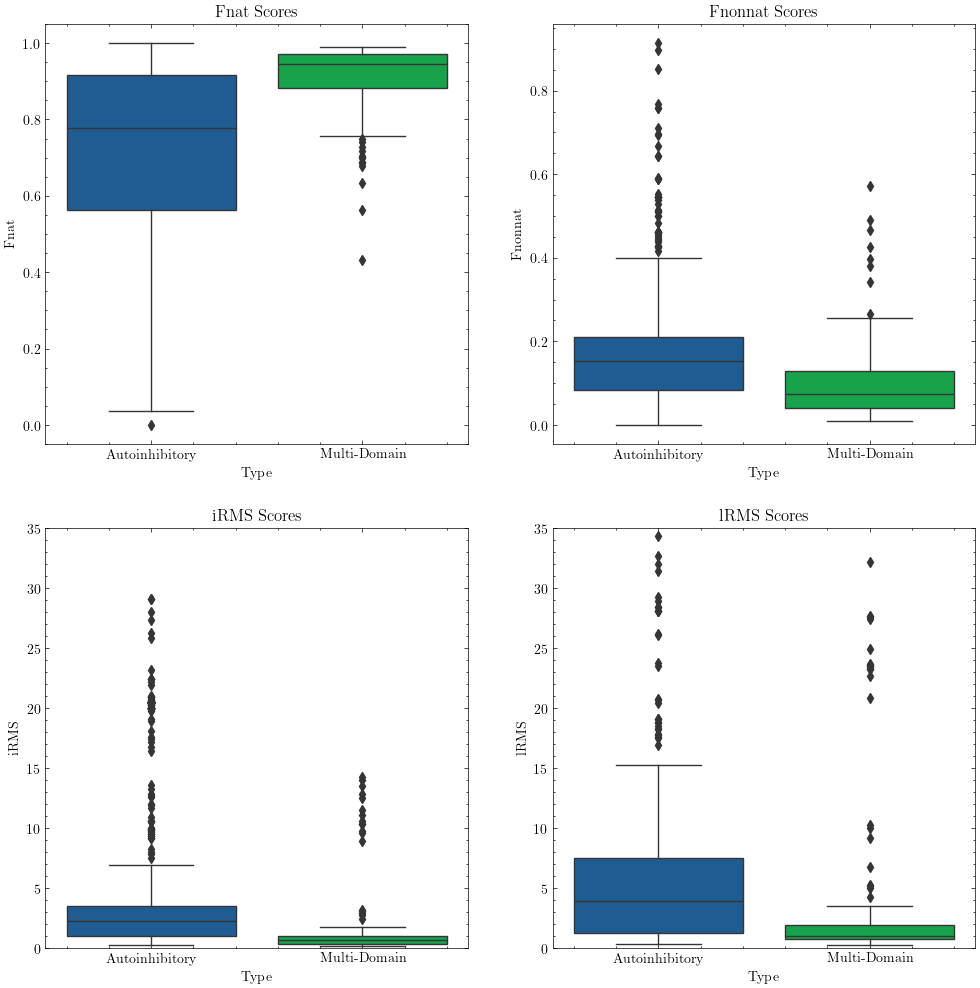

In [297]:
# Make boxplots of the four different scores
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Fnat
sns.boxplot(data=df, x='type', y='fnat', ax=ax[0, 0])
ax[0, 0].set_title('Fnat Scores')
ax[0, 0].set_ylabel('Fnat')
ax[0, 0].set_xlabel('Type')

# Fnonnat
sns.boxplot(data=df, x='type', y='fnonnat', ax=ax[0, 1])
ax[0, 1].set_title('Fnonnat Scores')
ax[0, 1].set_ylabel('Fnonnat')
ax[0, 1].set_xlabel('Type')

# iRMS
sns.boxplot(data=df, x='type', y='irms', ax=ax[1, 0])
ax[1, 0].set_title('iRMS Scores')
ax[1, 0].set_ylabel('iRMS')
ax[1, 0].set_xlabel('Type')
ax[1, 0].set_ylim(0, 35)
# lRMS
sns.boxplot(data=df, x='type', y='lrms', ax=ax[1, 1])
ax[1, 1].set_title('lRMS Scores')
ax[1, 1].set_ylabel('lRMS')
ax[1, 1].set_xlabel('Type')
ax[1, 1].set_ylim(0, 35)


# # Annotate statistical significance
# pairs = ['Autoinhibitory' 'Multi-Domain']
# order = ['Autoinhibitory', 'Multi-Domain']
# annotator = Annotator(ax[1, 1], pairs, data=df, x='type', y='lrms', order=order, hue='type')
# annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
# annotator.apply_and_annotate()

plt.savefig('./project_pipeline/data/figures/dockq_boxplots.png', dpi=300)


## Capri Classes for Two-State Proteins

In [298]:
# Get two-state proteins
twodf = pd.read_csv('./project_pipeline/data/two_states.tsv', sep='\t').astype('object')
twolist = twodf['uniprot'].unique().tolist()

# Subset dataframe
two = ai[ai['uniprot'].isin(twolist)].reset_index(drop=True)

# Concatenate dataframes with classifications
two['type'] = 'Two-State'

# Make capri classes categorical for two-state
two['capri'] = pd.Categorical(two['capri'], ['High', 'Medium', 'Acceptable', 'Incorrect'])

df2 = pd.concat([two, md])
print(len(two))
print(len(twolist))

241
18


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


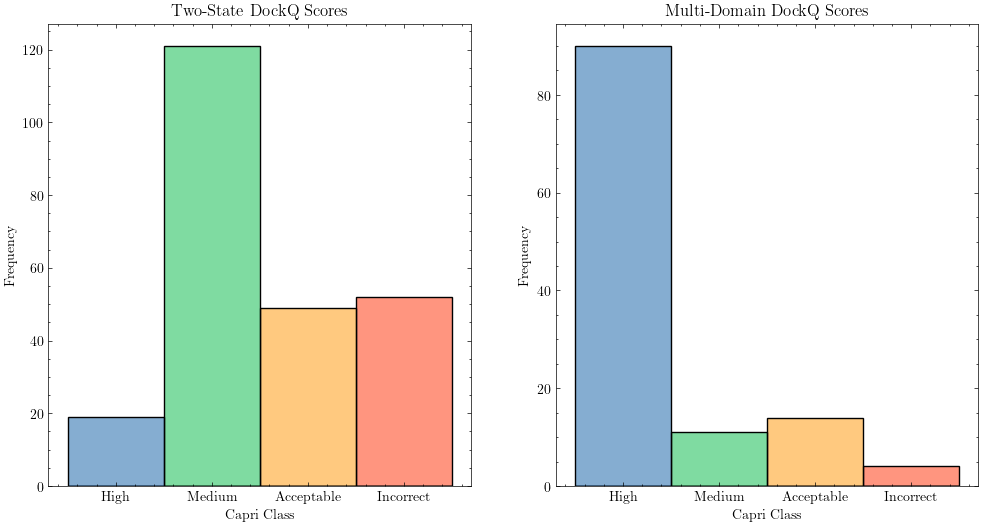

In [299]:
# Make histograms of both
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Autoinhibitory DockQ
sns.histplot(two, x='capri', hue='capri', ax=ax[0])
ax[0].set_title('Two-State DockQ Scores')
ax[0].set_xlabel('Capri Class')
ax[0].set_ylabel('Frequency')
ax[0].legend(frameon=False)
# MD DockQ
sns.histplot(md, x='capri', hue='capri', ax=ax[1])
ax[1].set_title('Multi-Domain DockQ Scores')
ax[1].set_xlabel('Capri Class')
ax[1].set_ylabel('Frequency')
ax[1].legend(frameon=False)

plt.savefig('./project_pipeline/data/figures/twoState_dockq_histograms.png', dpi=300)

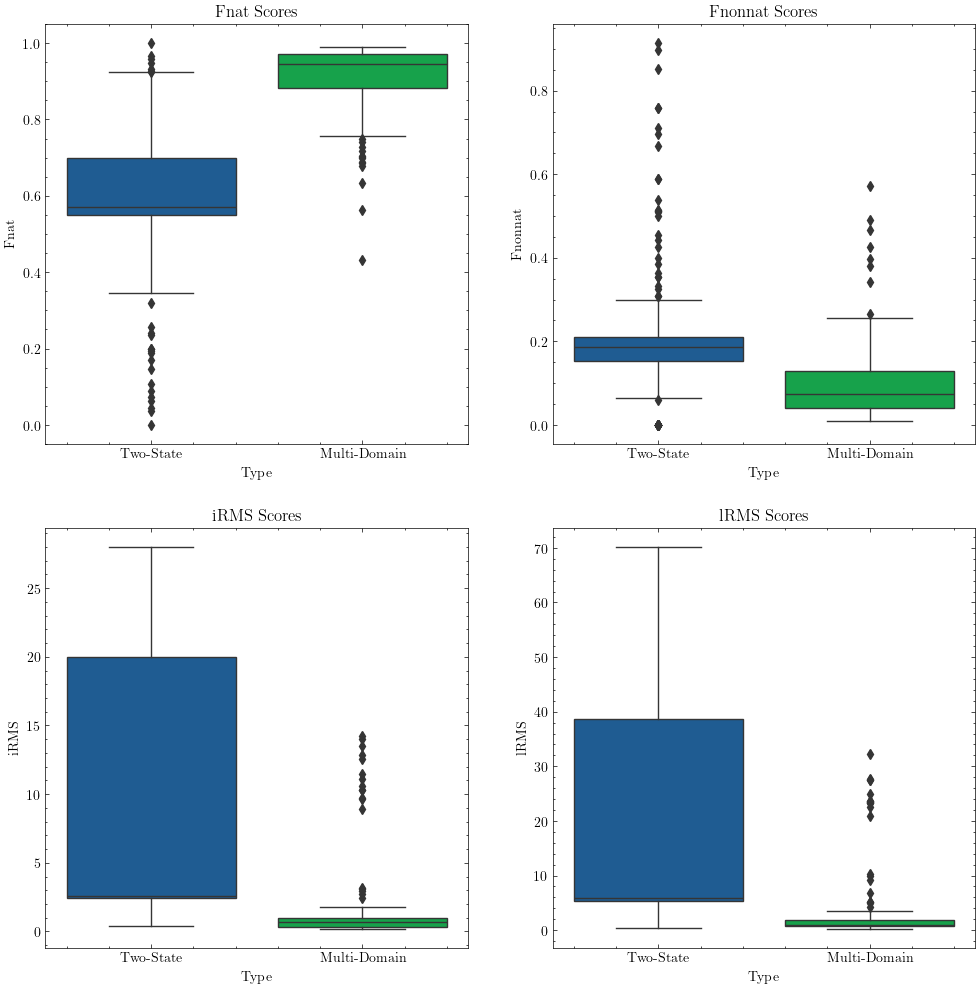

In [300]:
# Make boxplots of the four different scores
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Fnat
sns.boxplot(data=df2, x='type', y='fnat', ax=ax[0, 0])
ax[0, 0].set_title('Fnat Scores')
ax[0, 0].set_ylabel('Fnat')
ax[0, 0].set_xlabel('Type')

# Fnonnat
sns.boxplot(data=df2, x='type', y='fnonnat', ax=ax[0, 1])
ax[0, 1].set_title('Fnonnat Scores')
ax[0, 1].set_ylabel('Fnonnat')
ax[0, 1].set_xlabel('Type')

# iRMS
sns.boxplot(data=df2, x='type', y='irms', ax=ax[1, 0])
ax[1, 0].set_title('iRMS Scores')
ax[1, 0].set_ylabel('iRMS')
ax[1, 0].set_xlabel('Type')
# lRMS
sns.boxplot(data=df2, x='type', y='lrms', ax=ax[1, 1])
ax[1, 1].set_title('lRMS Scores')
ax[1, 1].set_ylabel('lRMS')
ax[1, 1].set_xlabel('Type')


# # Annotate statistical significance
# pairs = ['Autoinhibitory' 'Multi-Domain']
# order = ['Autoinhibitory', 'Multi-Domain']
# annotator = Annotator(ax[1, 1], pairs, data=df, x='type', y='lrms', order=order, hue='type')
# annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
# annotator.apply_and_annotate()

plt.savefig('./project_pipeline/data/figures/twoState_dockq_boxplots.png', dpi=300)

## Only Proteins with Closed Structures

Here we want to look at the dockq scores only for proteins with closed structures

In [305]:
# Subset dataframe for closed proteins
closed = cl3[cl3['conformation'] == 'Closed']

# Get uniprots from closed dataframe
closedlist = closed['uniprot'].unique().tolist()

# # Subset dockq dataframe to have only these proteins
# closedDockq = ai[ai['uniprot'].isin(closedlist)].reset_index(drop=True)

# Subset classified dataframe to have only these proteins
closedCl = cl3[cl3['uniprot'].isin(closedlist)].reset_index(drop=True)
closedCl = closedCl.dropna(subset=['conformation', 'state'])

# Merge with classified files to get state and conformation
closedMerge = pd.merge(ai, closed, on=['uniprot', 'pdb'], how='inner')
closedMerge['capri'] = pd.Categorical(closedMerge['capri'], ['High', 'Medium', 'Acceptable', 'Incorrect'])

# Concatenate dataframes with classifications
closedMerge['type'] = 'Autoinhibitory'

df3 = pd.concat([closedMerge, md])


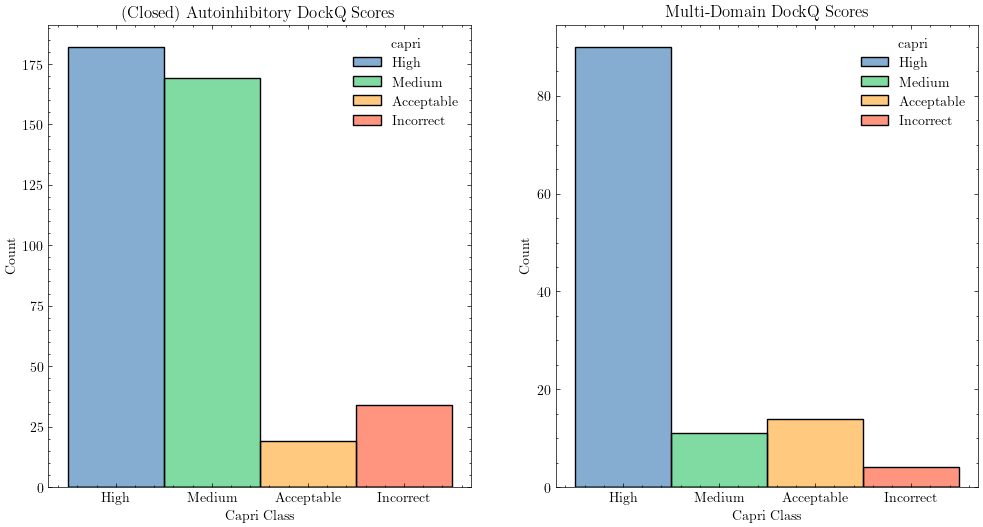

In [302]:
# Plot the closed DockQ scores

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(closedMerge, x='capri', hue='capri', ax=ax[0])
ax[0].set_title('(Closed) Autoinhibitory DockQ Scores')
ax[0].set_xlabel('Capri Class')

sns.histplot(md, x='capri', hue='capri', ax=ax[1])
ax[1].set_title('Multi-Domain DockQ Scores')
ax[1].set_xlabel('Capri Class')

plt.savefig('./project_pipeline/data/figures/closed_dockq_histograms.png', dpi=300)

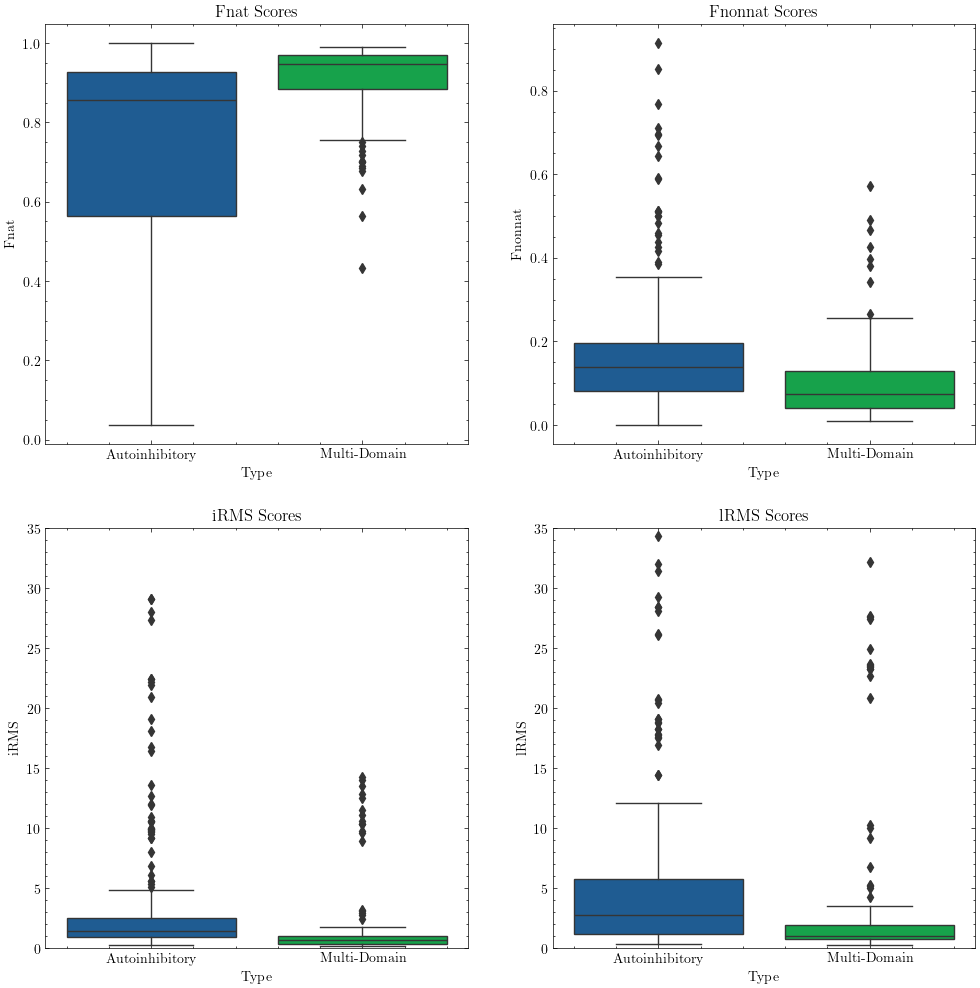

In [306]:
# Make boxplots of the four different scores
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Fnat
sns.boxplot(data=df3, x='type', y='fnat', ax=ax[0, 0])
ax[0, 0].set_title('Fnat Scores')
ax[0, 0].set_ylabel('Fnat')
ax[0, 0].set_xlabel('Type')

# Fnonnat
sns.boxplot(data=df3, x='type', y='fnonnat', ax=ax[0, 1])
ax[0, 1].set_title('Fnonnat Scores')
ax[0, 1].set_ylabel('Fnonnat')
ax[0, 1].set_xlabel('Type')

# iRMS
sns.boxplot(data=df3, x='type', y='irms', ax=ax[1, 0])
ax[1, 0].set_title('iRMS Scores')
ax[1, 0].set_ylabel('iRMS')
ax[1, 0].set_xlabel('Type')
ax[1, 0].set_ylim(0, 35)
# lRMS
sns.boxplot(data=df3, x='type', y='lrms', ax=ax[1, 1])
ax[1, 1].set_title('lRMS Scores')
ax[1, 1].set_ylabel('lRMS')
ax[1, 1].set_xlabel('Type')
ax[1, 1].set_ylim(0, 35)

plt.savefig('./project_pipeline/data/figures/closed_dockq_boxplots.png', dpi=300)

## Closed Two-State Autoinhibitory Proteins

Now we look at solely those strutures that are closed for two-state proteins

In [312]:
twoClosed = two[two['conformation'] == 'Closed']

# Concatenate dataframes with classifications
df4 = pd.concat([twoClosed, md])

Text(0.5, 0, 'Capri Class')

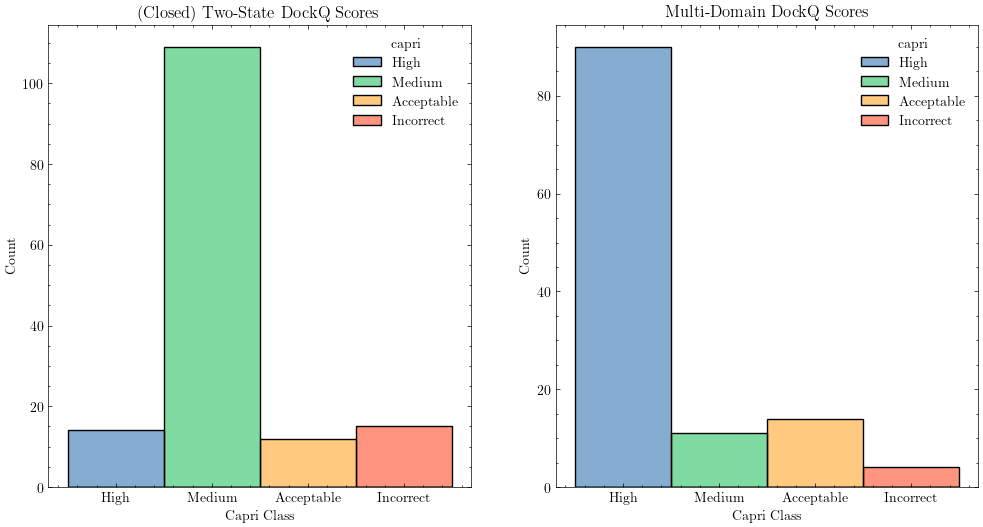

In [313]:
# Plot the closed Two-state DockQ scores

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(twoClosed, x='capri', hue='capri', ax=ax[0])
ax[0].set_title('(Closed) Two-State DockQ Scores')
ax[0].set_xlabel('Capri Class')

sns.histplot(md, x='capri', hue='capri', ax=ax[1])
ax[1].set_title('Multi-Domain DockQ Scores')
ax[1].set_xlabel('Capri Class')

## Putting them all in a single graph

We're going to put the closed two-state, closed autoinhibitory, and closed multi-domain in the same graph.

In [385]:
# Slightly modify the types
twoClosed['type'] = 'Two-State AI'
closedMerge['type'] = 'All AI'

# Concatenate dataframes with classifications
df5 = pd.concat([twoClosed, closedMerge, md]).reset_index(drop=True)

sns.set_palette('Set2')


/tmp/ipykernel_1816631/61725675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoClosed['type'] = 'Two-State AI'


Adapting Alireza's code for his plot.

In [408]:
CAPRI_CLASSES = ['Incorrect', 'Acceptable', 'Medium', 'High']
order = ['All AI', 'Two-State AI', 'Multi-Domain']

In [396]:
# Function to calculate the luminance of a color
def get_luminance(color):
    # Convert color to RGB (assuming it's in hex format if it's a string)
    if isinstance(color, str):
        color = plt.colors.to_rgb(color)  # Converts hex to RGB if necessary
    # Calculate luminance using a formula that accounts for human eye sensitivity
    luminance = 0.299 * color[0] + 0.587 * color[1] + 0.114 * color[2]
    return luminance

def make_color_gradient(color1, color2, n):
    # Convert color to RGB (assuming it's in hex format if it's a string)
    if isinstance(color1, str):
        color1 = mcolors.to_rgb(color1)  # Converts hex to RGB if necessary
    if isinstance(color2, str):
        color2 = mcolors.to_rgb(color2)  # Converts hex to RGB if necessary
    # Create a color gradient
    gradient = [color1]
    for i in range(1, n):
        # Calculate the intermediate color
        new_color = [color1[j] + (color2[j] - color1[j]) * i / (n - 1) for j in range(3)]
        gradient.append(new_color + [1])
    return gradient

In [410]:
# RG_DATASET_COLOR = 'dodgerblue'
ALL_AI_COLOR = 'deepskyblue'
TWO_STATE_AI_COLOR = 'limegreen'
MULTI_DOMAIN_COLOR = 'orange'
# SCANIDR_DATASET_COLOR = 'slateblue'
# DECOYS_DATASET_COLOR = 'darkgrey'

LIGHT_GREY = mcolors.to_rgba('lightgrey')
# CAPRI_COLORS_RG = [LIGHT_GREY] + make_color_gradient('white', RG_DATASET_COLOR, 5)[-4:]
CAPRI_COLORS_ALL_AI = [LIGHT_GREY] + make_color_gradient('white', ALL_AI_COLOR, 5)[-4:]
CAPRI_COLORS_TWO_STATE = [LIGHT_GREY] + make_color_gradient('white', TWO_STATE_AI_COLOR, 5)[-4:]
CAPRI_COLORS_MULTI_DOMAIN = [LIGHT_GREY] + make_color_gradient('white', MULTI_DOMAIN_COLOR, 5)[-4:]
# CAPRI_COLORS_SCANIDR = [LIGHT_GREY] + make_color_gradient('white', SCANIDR_DATASET_COLOR, 5)[-4:]

In [405]:
class MultipleRectanglesHandler(HandlerBase):
    def __init__(self, colors):
        self.colors = colors
        super().__init__()

    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        # Create as many rectangles as there are colors
        rects = []
        for i, color in enumerate(self.colors):
            rect = Rectangle([x0 + (width / len(self.colors)) * i, y0], 
                                     width / len(self.colors), height, 
                                     facecolor=color, edgecolor=None, 
                                     transform=trans)
            rects.append(rect)
        return rects

AttributeError: Rectangle.set() got an unexpected keyword argument 'binwidth'

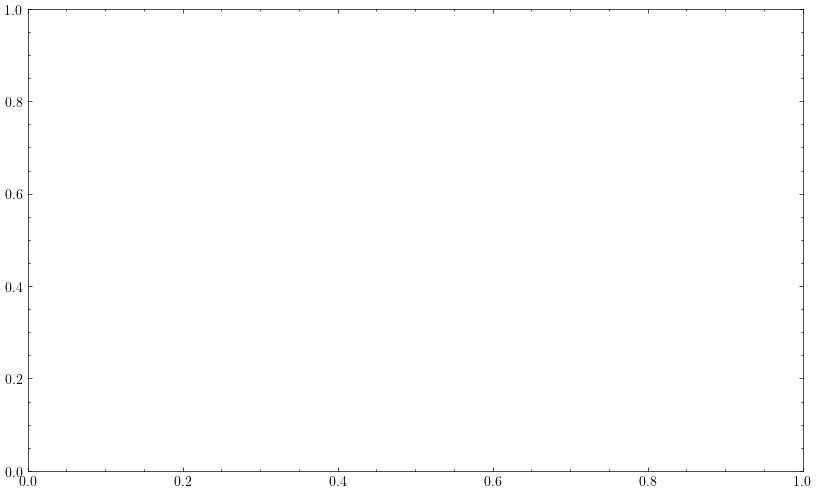

In [422]:
# Make a histplot of the three types

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
(df5
 .groupby('type')['capri']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pivot(index='type', columns='capri', values='percent')[CAPRI_CLASSES]
    .reindex(CAPRI_CLASSES, axis=1)
    .reindex(order, axis=0)
    .plot(kind='bar', stacked=True, rot=0, legend=False, ax=ax, width=0.5)
)

plt.ylabel('%')
plt.xlabel('Dataset')
plt.ylabel('% Success')
# plt.xticks([0, 1], ['Full IDP', 'Delimited IDP'])
plt.ylim(0, 115)

# set palettes
for i, bar in enumerate(plt.gca().patches):
    if i % len(order) == 0:
        bar.set_color(CAPRI_COLORS_MULTI_DOMAIN[i//len(order)+1])
    if i % len(order) == 1:
        bar.set_color(CAPRI_COLORS_TWO_STATE[i//len(order)+1])
    if i % len(order) == 2:
        bar.set_color(CAPRI_COLORS_ALL_AI[i//len(order)+1])
    # if i % len(order) == 3:
    #     bar.set_color(CAPRI_COLORS_RG[i//len(order)+1]) 
    # if i % len(order) == 4:
    #     bar.set_color(CAPRI_COLORS_SCANIDR[i//len(order)+1])

# text on top of bars with percentage
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    color = 'white' if get_luminance(p.get_facecolor()) <= 0.7 else 'black'  # Choose color based on luminance
    plt.gca().annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', color=color, fontsize=10)

# x_sum = {}
# for p in plt.gca().patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy()
#     x_sum[x] = x_sum.get(x, 0) + height
# for p in plt.gca().patches[-len(order):]:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy()
#     plt.gca().annotate(f'{x_sum[x]:.1f}%', (x + width / 2, y + height+2), ha='center', va='bottom', color='k', fontsize=16)

# legend
high_handle = object()
medium_handle = object()
acceptable_handle = object()
incorrect_handle = object()
pals = [CAPRI_COLORS_MULTI_DOMAIN, CAPRI_COLORS_TWO_STATE, CAPRI_COLORS_ALL_AI] # CAPRI_COLORS_RG, CAPRI_COLORS_SCANIDR
ax.legend(
    title='',
    handles=[incorrect_handle, acceptable_handle, medium_handle, high_handle],
    handler_map={
        high_handle: MultipleRectanglesHandler([pal[4] for pal in pals]),
        medium_handle: MultipleRectanglesHandler([pal[3] for pal in pals]),
        acceptable_handle: MultipleRectanglesHandler([pal[2] for pal in pals]),
        incorrect_handle: MultipleRectanglesHandler([pal[1] for pal in pals]),
    },
    labels=['Incorrect', 'Acceptable', 'Medium', 'High'],
    loc='upper left'
)
    
plt.tight_layout()